In [1]:
import numpy as np
import pandas as pd

import os
import sys
from tqdm import tqdm_notebook as tqdm
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
import torchvision
import PIL

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()
model.cuda()

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
  

# inference

In [3]:
IMAGE_DIR = "../input/test/"

In [4]:
#!wget https://storage.googleapis.com/openimages/challenge_2019/challenge-2019-classes-description-500.csv

In [5]:
class_lookup_df = pd.read_csv("./challenge-2019-classes-description-500.csv", header=None)
empty_submission_df = pd.read_csv("../input/sample_submission.csv")
empty_submission_df["PredictionString"] = [""] * len(empty_submission_df)

In [6]:
class_lookup_df.columns = ["encoded_label","label"]
class_lookup_df['label'] = class_lookup_df['label'].str.lower()
class_lookup_df.head()

,encoded_label,label
0,/m/061hd_,infant bed
1,/m/06m11,rose
2,/m/03120,flag
3,/m/01kb5b,flashlight
4,/m/0120dh,sea turtle


In [7]:
empty_submission_df.head()

,ImageId,PredictionString
0,b5d912e06f74e948,
1,be137cf6bb0b62d5,
2,8d65ca08cb5ce8e8,
3,4d3ad1e52ad8c065,
4,9b94408691c7d7bf,


In [8]:
sample_image = "../input/test/52c49cd9fee4319b.jpg"
image = PIL.Image.open(sample_image)
image_tensor = torchvision.transforms.functional.to_tensor(image).cuda()
r = model(image_tensor.reshape((1,image_tensor.shape[0],image_tensor.shape[1],image_tensor.shape[2])))
result = r[0]

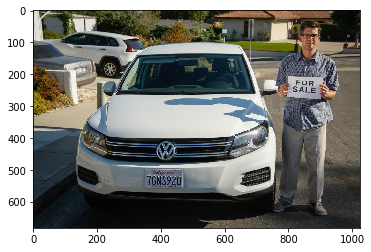

In [9]:
from matplotlib import pyplot as plt
plt.imshow(image)
plt.show()

See:
https://pytorch.org/docs/stable/torchvision/models.html

In [10]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
coco_names = COCO_INSTANCE_CATEGORY_NAMES

In [11]:
coco_names.index("car")

3

In [12]:
result

{'boxes': tensor([[7.5487e+02, 2.9722e+01, 9.6143e+02, 6.3472e+02],
         [0.0000e+00, 9.7003e+01, 1.9931e+02, 2.4473e+02],
         [6.0118e+01, 6.1631e+01, 3.5366e+02, 2.1324e+02],
         [1.1716e+02, 9.8345e+01, 7.5876e+02, 6.3908e+02],
         [0.0000e+00, 1.4145e+02, 1.4980e+02, 2.9258e+02],
         [1.4090e+02, 6.1815e+01, 7.8708e+02, 6.2575e+02],
         [9.7245e+02, 9.3629e+01, 9.8636e+02, 1.1977e+02],
         [7.9973e+02, 3.8362e+01, 8.3843e+02, 9.1117e+01],
         [2.9588e+01, 6.9283e+01, 3.5501e+02, 2.2415e+02],
         [2.2557e+02, 1.0195e+02, 6.9722e+02, 2.7969e+02],
         [5.3795e+02, 2.1666e+02, 6.2580e+02, 2.4584e+02],
         [3.0846e-01, 3.6324e+02, 1.4457e+02, 6.2589e+02],
         [9.7520e+02, 7.3556e+01, 9.8942e+02, 1.0721e+02]], device='cuda:0',
        grad_fn=<StackBackward>),
 'labels': tensor([ 1,  3,  3,  3,  3,  8, 11, 64,  8,  3, 62,  3,  1], device='cuda:0'),
 'scores': tensor([0.9998, 0.9809, 0.9805, 0.9597, 0.2427, 0.2097, 0.1921, 0.1369,

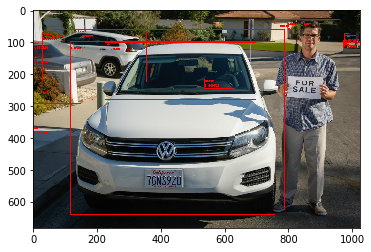

In [13]:
from PIL import ImageDraw
draw = ImageDraw.Draw(image)
boxes = result['boxes'].detach().cpu().numpy()
labels = result['labels'].detach().cpu().numpy()
scores = result['scores'].detach().cpu().numpy()
for box,label,score in zip(boxes,labels,scores):
    labelname = coco_names[label]
    draw.rectangle((box[0], box[1], box[2], box[3]), outline=(255, 0, 0))
    draw.text((box[0], box[1]), "%s\n%03f"%(labelname,score), fill=(255, 0, 0))
plt.imshow(image)
plt.show()

In [14]:
ImageID_list = []
PredictionString_list = []

for file_id in tqdm(empty_submission_df["ImageId"].values, total=len(empty_submission_df)):
    image = PIL.Image.open(os.path.join(IMAGE_DIR, file_id+".jpg"))
    image_tensor = torchvision.transforms.functional.to_tensor(image).cuda()
    
    width = image.width
    height = image.height

    r = model(image_tensor.reshape((1,image_tensor.shape[0],image_tensor.shape[1],image_tensor.shape[2])))
    result = r[0]
    boxes = result['boxes'].detach().cpu().numpy()
    labels = result['labels'].detach().cpu().numpy()
    scores = result['scores'].detach().cpu().numpy()
        
    PredictionString = ""

    for box,label,score in zip(boxes,labels,scores):
        labelname = coco_names[label]
        
        if class_lookup_df[class_lookup_df["label"] == labelname].shape[0] == 0:
            # no match label
            continue
            
        encoded_label = class_lookup_df[class_lookup_df["label"] == labelname]["encoded_label"].values[0]

        PredictionString += encoded_label 
        PredictionString += " "
        PredictionString += str(score)
        PredictionString += " "
        PredictionString += str(min(box[0] / width, 1.0))
        PredictionString += " "
        PredictionString += str(min(box[1] / height, 1.0))
        PredictionString += " "
        PredictionString += str(min(box[2] / width, 1.0))
        PredictionString += " "
        PredictionString += str(min(box[3] / height, 1.0))
        PredictionString += " "
    ImageID_list.append(file_id)
    PredictionString_list.append(PredictionString)

In [15]:
results=pd.DataFrame({"ImageId":ImageID_list,
                      "PredictionString":PredictionString_list
                     })

In [16]:
results.head()

,ImageId,PredictionString
0,b5d912e06f74e948,/m/01g317 0.9994374 0.3128848671913147 0.30147...
1,be137cf6bb0b62d5,/m/01g317 0.99232894 0.4846595823764801 0.1071...
2,8d65ca08cb5ce8e8,/m/01g317 0.87913686 0.6015755335489908 0.3499...
3,4d3ad1e52ad8c065,/m/01g317 0.97740483 0.03904658624210417 0.013...
4,9b94408691c7d7bf,/m/01g317 0.9784816 0.568895697593689 0.002895...


In [17]:
results.shape

(99999, 2)

In [18]:
results.to_csv("submission005.csv", index=False)